In [105]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [116]:
weather_trainA = pd.read_csv('region_A_train.csv', index_col='date')
weather_trainB = pd.read_csv('region_B_train.csv', index_col='date')
# weather_test = pd.read_csv('region_A_test.csv', index_col='date')

In [117]:
weather_trainA

,avg.temp,max.temp,min.temp,precipitation,avg.wind.speed,max.wind.speed,max.wind.speed.dir,max.inst.wind.speed,max.inst.wind.speed.dir,min.atmos.pressure
date,,,,,,,,,,
229b70a3,3.3,10.2,-2.4,0.0,2.9,9.3,W,14.3,W,1015.1
3134f4ff,5.7,13.7,-2.9,0.0,3.6,10.7,W,15.8,W,1011.3
dbfaf910,13.8,20.0,9.0,0.0,5.3,9.4,SW,15.2,W,1004.2
3aea0cf0,11.4,19.3,5.8,0.0,4.2,10.1,SW,20.6,SW,1001.7
f0227f56,2.4,7.7,0.3,43.5,0.9,3.7,SW,5.7,SW,1003.5
...,...,...,...,...,...,...,...,...,...,...
91b2797d,9.5,16.1,3.6,0.0,1.5,3.9,SW,6.2,SW,1014.2
b807fd87,10.9,17.4,5.3,0.0,2.0,5.5,NE,9.9,NE,1015.6
8e0a48e0,12.7,20.0,8.2,0.0,1.7,5.2,SW,8.2,SW,1013.6


In [121]:
core_trainA = weather_trainA[['avg.temp', 'max.temp', 'min.temp', 'precipitation', 'avg.wind.speed', 'max.wind.speed', 'max.inst.wind.speed', 'min.atmos.pressure']].copy()
core_trainB = weather_trainB[['avg.temp', 'max.temp', 'min.temp', 'precipitation', 'avg.wind.speed', 'max.wind.speed', 'max.inst.wind.speed']].copy()
# core_test = weather_test[['avg.temp', 'max.temp', 'min.temp', 'precipitation']].copy()

In [122]:
core_trainA

,avg.temp,max.temp,min.temp,precipitation,avg.wind.speed,max.wind.speed,max.inst.wind.speed,min.atmos.pressure
date,,,,,,,,
229b70a3,3.3,10.2,-2.4,0.0,2.9,9.3,14.3,1015.1
3134f4ff,5.7,13.7,-2.9,0.0,3.6,10.7,15.8,1011.3
dbfaf910,13.8,20.0,9.0,0.0,5.3,9.4,15.2,1004.2
3aea0cf0,11.4,19.3,5.8,0.0,4.2,10.1,20.6,1001.7
f0227f56,2.4,7.7,0.3,43.5,0.9,3.7,5.7,1003.5
...,...,...,...,...,...,...,...,...
91b2797d,9.5,16.1,3.6,0.0,1.5,3.9,6.2,1014.2
b807fd87,10.9,17.4,5.3,0.0,2.0,5.5,9.9,1015.6
8e0a48e0,12.7,20.0,8.2,0.0,1.7,5.2,8.2,1013.6


In [123]:
core_trainB

,avg.temp,max.temp,min.temp,precipitation,avg.wind.speed,max.wind.speed,max.inst.wind.speed
date,,,,,,,
229b70a3,2.6,9.3,-3.3,0.0,2.8,6.3,11.4
3134f4ff,5.1,14.6,-4.6,0.0,2.3,5.8,10.4
dbfaf910,12.3,19.0,5.2,0.0,2.7,7.9,13.6
3aea0cf0,11.0,20.1,6.5,0.0,3.2,7.0,17.0
f0227f56,2.1,5.9,0.2,42.5,1.2,3.3,5.3
...,...,...,...,...,...,...,...
91b2797d,9.3,16.9,2.5,0.0,1.9,4.6,8.2
b807fd87,9.3,15.2,3.7,0.0,3.0,6.2,10.8
8e0a48e0,11.6,19.5,5.8,0.0,1.7,6.2,12.1


<Axes: xlabel='date'>

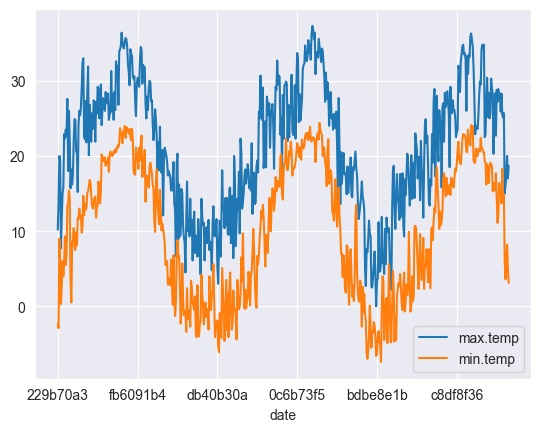

In [124]:
core_trainA[['max.temp', 'min.temp']].plot()

<Axes: xlabel='date'>

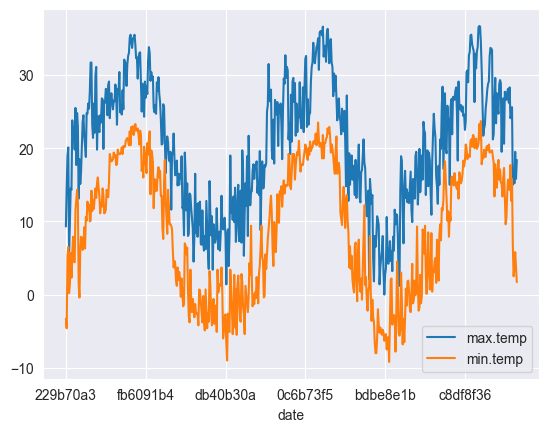

In [125]:
core_trainB[['max.temp', 'min.temp']].plot()

In [126]:
core_trainA['target'] = core_trainA.shift(-1)['precipitation']
core_trainB['target'] = core_trainB.shift(-1)['precipitation']
# core_test['target'] = core_test.shift(-1)['precipitation']

In [127]:
core_trainA

,avg.temp,max.temp,min.temp,precipitation,avg.wind.speed,max.wind.speed,max.inst.wind.speed,min.atmos.pressure,target
date,,,,,,,,,
229b70a3,3.3,10.2,-2.4,0.0,2.9,9.3,14.3,1015.1,0.0
3134f4ff,5.7,13.7,-2.9,0.0,3.6,10.7,15.8,1011.3,0.0
dbfaf910,13.8,20.0,9.0,0.0,5.3,9.4,15.2,1004.2,0.0
3aea0cf0,11.4,19.3,5.8,0.0,4.2,10.1,20.6,1001.7,43.5
f0227f56,2.4,7.7,0.3,43.5,0.9,3.7,5.7,1003.5,0.0
...,...,...,...,...,...,...,...,...,...
91b2797d,9.5,16.1,3.6,0.0,1.5,3.9,6.2,1014.2,0.0
b807fd87,10.9,17.4,5.3,0.0,2.0,5.5,9.9,1015.6,0.0
8e0a48e0,12.7,20.0,8.2,0.0,1.7,5.2,8.2,1013.6,0.0


In [128]:
core_trainB

,avg.temp,max.temp,min.temp,precipitation,avg.wind.speed,max.wind.speed,max.inst.wind.speed,target
date,,,,,,,,
229b70a3,2.6,9.3,-3.3,0.0,2.8,6.3,11.4,0.0
3134f4ff,5.1,14.6,-4.6,0.0,2.3,5.8,10.4,0.0
dbfaf910,12.3,19.0,5.2,0.0,2.7,7.9,13.6,0.0
3aea0cf0,11.0,20.1,6.5,0.0,3.2,7.0,17.0,42.5
f0227f56,2.1,5.9,0.2,42.5,1.2,3.3,5.3,0.0
...,...,...,...,...,...,...,...,...
91b2797d,9.3,16.9,2.5,0.0,1.9,4.6,8.2,0.0
b807fd87,9.3,15.2,3.7,0.0,3.0,6.2,10.8,0.0
8e0a48e0,11.6,19.5,5.8,0.0,1.7,6.2,12.1,0.0


In [129]:
core_trainA = core_trainA.iloc[:-1,:].copy()
core_trainB = core_trainB.iloc[:-1,:].copy()

In [130]:
reg = Ridge(alpha=.1)

In [131]:
predictors = ['avg.temp', 'max.temp', 'min.temp', 'precipitation', 'avg.wind.speed', 'max.wind.speed', 'max.inst.wind.speed']

In [132]:
reg.fit(core_trainA[predictors], core_trainB['target'])

Ridge(alpha=0.1)

In [133]:
predictions = reg.predict(core_trainB[predictors])

In [134]:
mean_absolute_error(core_trainB['target'], predictions)

6.6751448252538506

In [135]:
combined = pd.concat([core_trainB['target'], pd.Series(predictions, index=core_trainB.index)], axis=1)
combined.columns = ['actual', 'predicted']

In [136]:
combined

,actual,predicted
date,,
229b70a3,0.0,1.160094
3134f4ff,0.0,4.039335
dbfaf910,0.0,3.127200
3aea0cf0,42.5,-1.939408
f0227f56,0.0,13.191237
...,...,...
b54ff73e,0.0,2.044520
91b2797d,0.0,3.471919
b807fd87,0.0,2.594767


<Axes: xlabel='date'>

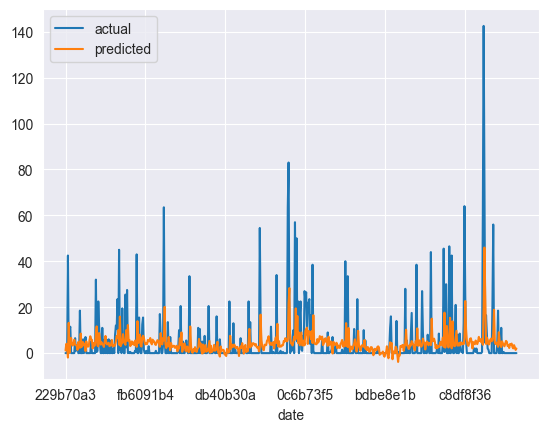

In [137]:
combined.plot()

In [138]:
reg.coef_

array([ 1.1594211 , -0.22239159, -0.7728253 ,  0.30652561,  0.38849255,
        0.50689111, -0.60238265])

In [139]:
def create_predictions(predictors, core_trainA, reg):
    train = core_trainA
    test = core_trainB
    reg.fit(train[predictors], test['target'])
    predictions = reg.predict(test[predictors])
    error = mean_absolute_error(test['target'], predictions)
    combined = pd.concat([test['target'], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ['actual', 'predicted']
    return error, combined

In [143]:
core_trainA['month.max'] = core_trainA['max.temp'].rolling(30).mean()

In [144]:
core_trainA['month.day.max'] = core_trainA['month.max'] / core_trainA['max.temp']

In [158]:
core_trainA

,avg.temp,max.temp,min.temp,precipitation,avg.wind.speed,max.wind.speed,max.inst.wind.speed,min.atmos.pressure,target,month.max,month.day.max,max.min
date,,,,,,,,,,,,
197576b0,19.3,29.0,9.8,0.0,1.8,6.0,9.1,1007.2,0.0,20.506667,0.707126,2.959184
ce8201a3,21.0,32.4,10.7,0.0,1.8,6.1,9.3,1011.9,0.0,21.130000,0.652160,3.028037
8da77a9a,23.3,33.0,14.7,0.0,2.6,8.1,11.7,1009.3,6.0,21.563333,0.653434,2.244898
68de3347,17.9,22.6,12.1,6.0,4.0,10.4,14.3,1001.6,1.0,21.673333,0.958997,1.867769
07aac6ee,16.7,22.2,13.6,1.0,1.7,5.0,7.3,1008.7,0.0,22.156667,0.998048,1.632353
...,...,...,...,...,...,...,...,...,...,...,...,...
b54ff73e,10.8,15.0,6.1,0.0,1.6,4.4,6.0,1019.7,0.0,27.210000,1.814000,2.459016
91b2797d,9.5,16.1,3.6,0.0,1.5,3.9,6.2,1014.2,0.0,26.606667,1.652588,4.472222
b807fd87,10.9,17.4,5.3,0.0,2.0,5.5,9.9,1015.6,0.0,26.026667,1.495785,3.283019


In [148]:
core_trainA['max.min'] = core_trainA['max.temp'] / core_trainA['min.temp']

In [149]:
predictors = ['avg.temp', 'max.temp', 'min.temp', 'precipitation', 'avg.wind.speed', 'max.wind.speed', 'max.inst.wind.speed', 'month.max', 'month.day.max', 'max.min']

In [151]:
core_trainA = core_trainA.iloc[30:,:].copy()

In [156]:
core_trainA = core_trainA.replace([np.inf, -np.inf], np.nan)

In [159]:
core_trainA = core_trainA.fillna(core_trainA.mean())

In [160]:
error, combined = create_predictions(predictors, core_trainA, reg)

ValueError: Found input variables with inconsistent numbers of samples: [535, 565]